# Tongue Rolling Examples

Import necessary libraries and functions:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use('ggplot')

## Discrete Bayesian Inference

Selected values for $\pi$:

In [2]:
pi_values = np.array([0.2, 0.5, 0.8])

Measured data in class (you might also try out smaller numbers to see that there is more uncertainty):

In [3]:
n = 27
k = 23

### Prior probabilities

In [4]:
uninformed_prior = np.ones(3) / 3
biologist_prior = np.array([1, 3, 8]) / 12

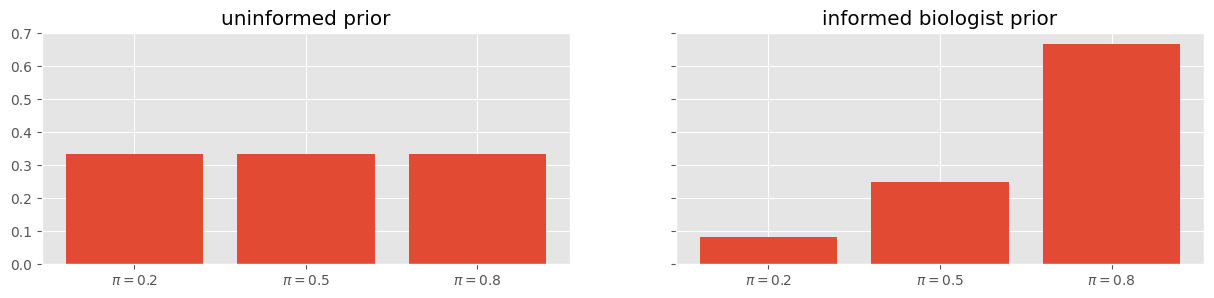

In [5]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(15,3) )
ax[0].bar( ["$\pi={}$".format(pi) for pi in pi_values], uninformed_prior )
ax[0].set_title("uninformed prior")
ax[1].bar( ["$\pi={}$".format(pi) for pi in pi_values], biologist_prior )
ax[1].set_title("informed biologist prior");

### Likelihood

Computes 
$$P(X=k|\pi=0.2) = \begin{pmatrix} n \\ k \end{pmatrix} \; 0.2^k \; 0.8^{(n-k)}$$

In [6]:
stats.binom.pmf(k=k, n=n, p=pi_values[0])

6.030134083583993e-13

Evaluate likelihood for all values of $\pi$:

In [7]:
likelihood = [stats.binom.pmf(k=k, n=n, p=pi) for pi in pi_values]
likelihood

[6.030134083583993e-13, 0.00013075768947601316, 0.16575506354872455]

Text(0.5, 1.0, 'likelihood (n=27, k=23)')

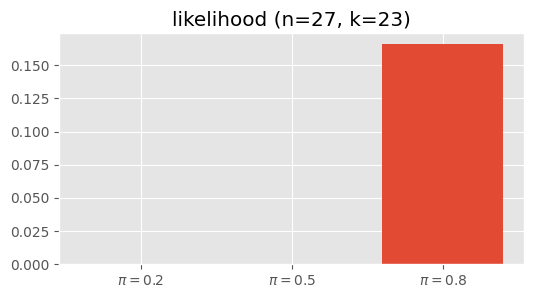

In [8]:
plt.figure( figsize=(6,3) )
plt.bar( ["$\pi={}$".format(pi) for pi in pi_values], likelihood )
plt.title("likelihood (n={}, k={})".format(n, k))

### Bayesian inference

$$P(\pi = \pi_i | Y=k ) = \frac{P(Y=k | \pi = \pi_i ) \; P( \pi = \pi_i )}{P(Y=k)}$$

Let's put it together and ignore the evidence for the moment:

In [9]:
posterior = likelihood * uninformed_prior
posterior

array([2.01004469e-13, 4.35858965e-05, 5.52516878e-02])

The evidence just normalizes the posterior such that it's a PMF - for this we don't have to compute the evidence!

In [10]:
posterior = posterior / np.sum( posterior )
posterior

array([3.63511121e-12, 7.88239094e-04, 9.99211761e-01])

Text(0.5, 1.0, 'using uninformed prior')

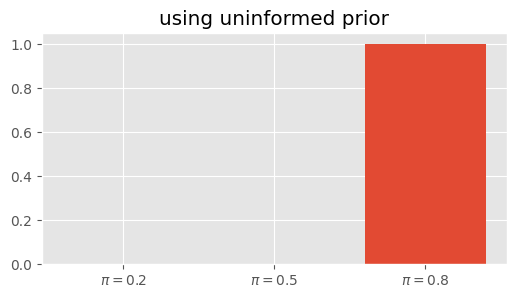

In [11]:
plt.figure( figsize=(6,3) )
plt.bar( ["$\pi={}$".format(pi) for pi in pi_values], posterior )
plt.title("using uninformed prior")

This reflects our posterior belief in the different specified values for $\pi$!

### What's the impact of the chosen prior?

Compute posteriors:

In [12]:
uninformed_posterior = likelihood * uninformed_prior
biologist_posterior = likelihood * biologist_prior
uninformed_posterior /= np.sum( uninformed_posterior )
biologist_posterior /= np.sum( biologist_posterior )

Plot:

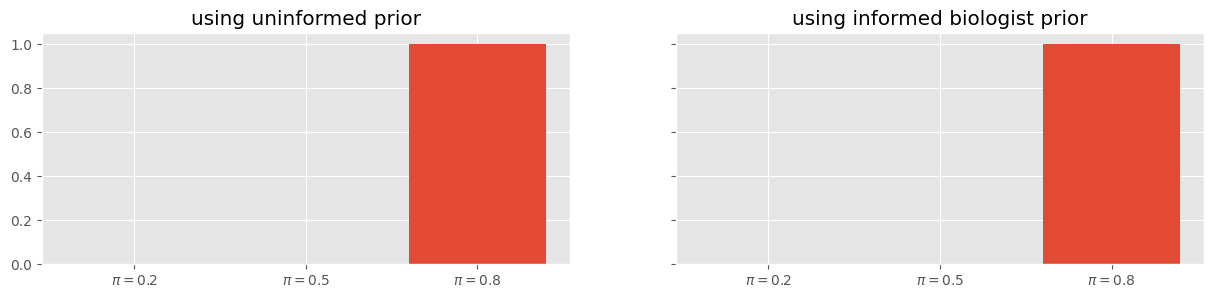

In [13]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(15,3) )
ax[0].bar( ["$\pi={}$".format(pi) for pi in pi_values], uninformed_posterior )
ax[0].set_title("using uninformed prior")
ax[1].bar( ["$\pi={}$".format(pi) for pi in pi_values], biologist_posterior )
ax[1].set_title("using informed biologist prior");

## Continuous Bayesian inference

### Prior distributions

In [14]:
alpha_uninformed = 1
beta_uninformed = 1

alpha_biologist = 75
beta_biologist = 25

Set evaluation range for pi:

In [15]:
pi_range = np.linspace(0, 1, 100)

Plot:

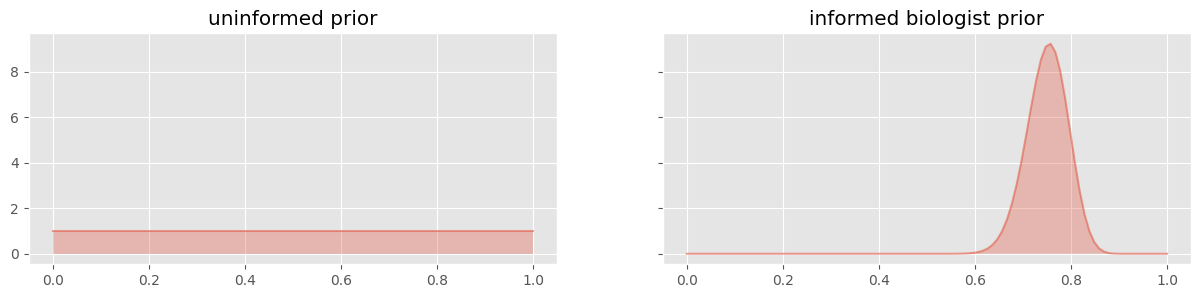

In [16]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(15,3) )
uninformed_prior = [stats.beta.pdf(pi, a=alpha_uninformed, b=beta_uninformed) for pi in pi_range]
ax[0].plot( pi_range, uninformed_prior, alpha=0.5 )
ax[0].fill_between( pi_range, uninformed_prior, alpha=0.3 )
ax[0].set_title("uninformed prior")
biologist_prior = [stats.beta.pdf(pi, a=alpha_biologist, b=beta_biologist) for pi in pi_range]
ax[1].plot( pi_range, biologist_prior, alpha=0.5 )
ax[1].fill_between( pi_range, biologist_prior, alpha=0.3 )
ax[1].set_title("informed biologist prior");

### Likelihood

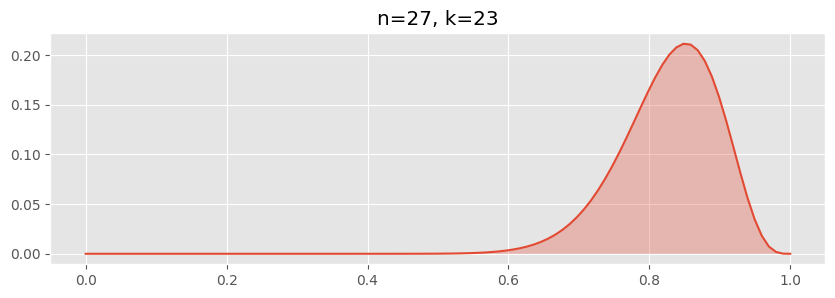

In [17]:
pi_range = np.linspace(0, 1, 100)
likelihood = [stats.binom.pmf(k=k, n=n, p=pi) for pi in pi_range]

plt.figure( figsize=(10,3) )
plt.plot( pi_range, likelihood )
plt.fill_between( pi_range, likelihood, alpha=0.3 )
plt.title( "n={}, k={}".format(n, k) );

The likelihood is not a probability distribution! (hence the different name)

### Posterior distributions

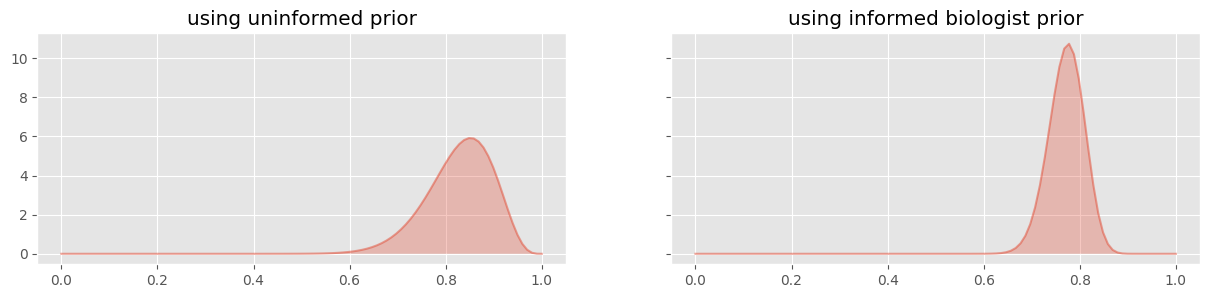

In [18]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(15,3) )
uninformed_posterior = [stats.beta.pdf(pi, a=alpha_uninformed+k, b=beta_uninformed+n-k) for pi in pi_range]
ax[0].plot( pi_range, uninformed_posterior, alpha=0.5 )
ax[0].fill_between( pi_range, uninformed_posterior, alpha=0.3 )
ax[0].set_title("using uninformed prior")
biologist_posterior = [stats.beta.pdf(pi, a=alpha_biologist+k, b=beta_biologist+n-k) for pi in pi_range]
ax[1].plot( pi_range, biologist_posterior, alpha=0.5 )
ax[1].fill_between( pi_range, biologist_posterior, alpha=0.3 )
ax[1].set_title("using informed biologist prior");

### Plotting everything all at once

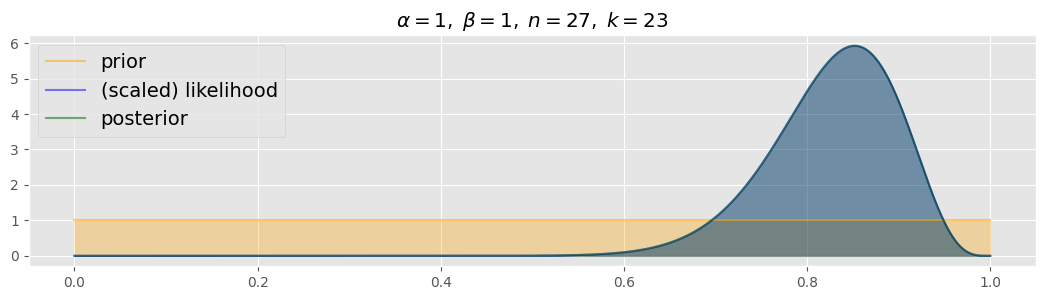

In [19]:
from scipy import stats

def plot_beta_binomial( alpha, beta, n, k, figsize=(13,3) ):
    # create figure
    plt.figure( figsize=figsize )
    
    # numeric evaluation range for pi
    pi_range = np.linspace(0, 1, 1000)
    
    # prior
    prior = [stats.beta.pdf(pi, a=alpha, b=beta) for pi in pi_range]
    plt.plot( pi_range, prior, alpha=0.5, label="prior", c="orange" )
    plt.fill_between( pi_range, prior, alpha=0.3, color="orange" )

    # scaled likelihood
    likelihood = [stats.binom.pmf(n=n, k=k, p=pi) for pi in pi_range]
    likelihood /= np.sum( likelihood ) * (pi_range[1]-pi_range[0])
    plt.plot( pi_range, likelihood, alpha=0.5, label="(scaled) likelihood", c="blue" )
    plt.fill_between( pi_range, likelihood, alpha=0.3, color="blue" )

    # posterior
    posterior = [stats.beta.pdf(pi, a=alpha+k, b=beta+n-k) for pi in pi_range]
    plt.plot( pi_range, posterior, alpha=0.5, label="posterior", color="darkgreen" )
    plt.fill_between( pi_range, posterior, alpha=0.3, color="darkgreen" )
    
    # enable legend and set descriptive title
    plt.legend( fontsize=14 )
    plt.title( "$\\alpha = {}, \; \\beta={}, \; n={}, \; k={}$".format(alpha, beta, n, k) )

plot_beta_binomial( 1, 1, n, k )

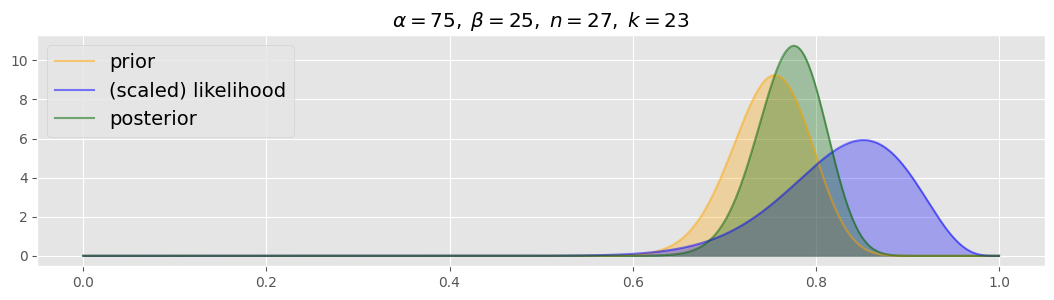

In [20]:
plot_beta_binomial( 75, 25, n, k )

## Summaries

In [21]:
def summarize_beta_binomial( alpha, beta, n, k, figsize=(13,3) ):
    alpha_prime = alpha + k
    beta_prime = beta + n - k

    # computing functions
    def expectation(alpha, beta):
        return alpha/(alpha+beta)

    def mode(alpha, beta):
        return (alpha-1)/(alpha+beta+2)

    def var(alpha, beta):
        return alpha * beta / ((alpha+beta)**2 * (alpha + beta + 1))

    def std(alpha, beta):
        return np.sqrt( var(alpha, beta) )
    
    
    #model alpha beta mean  mode      var      sd
    
    return pd.DataFrame({
        'model': ['prior', 'posterior'],
        'alpha': [alpha, alpha_prime],
        'beta': [beta, beta_prime],
        'mean': [expectation(alpha, beta), expectation(alpha_prime, beta_prime)],
        'mode': [mode(alpha, beta), mode(alpha_prime, beta_prime)],
        'var': [var(alpha, beta), var(alpha_prime, beta_prime)],
        'std': [std(alpha, beta), std(alpha_prime, beta_prime)]
    })

summarize_beta_binomial( 1, 1, n, k )

,model,alpha,beta,mean,mode,var,std
0,prior,1,1,0.500000,0.000000,0.083333,0.288675
1,posterior,24,5,0.827586,0.741935,0.004756,0.068966


In [22]:
summarize_beta_binomial( 75, 25, n, k )

,model,alpha,beta,mean,mode,var,std
0,prior,75,25,0.750000,0.725490,0.001856,0.043086
1,posterior,98,29,0.771654,0.751938,0.001377,0.037103
